In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the LUNA transit models into DataFrames
kepler = pd.read_csv('LUNA_lc/Kepler_solution.xam', sep='\s+', names=['time', '_', '__', 'flux'])
tess = pd.read_csv('LUNA_lc/TESS_solution.xam', sep='\s+', names=['time', '_', '__', 'flux'])
whitin = pd.read_csv('LUNA_lc/Whitin_solution.xam', sep='\s+', names=['time', '_', '__', 'flux'])
lco = pd.read_csv('LUNA_lc/LCO_solution.xam', sep='\s+', names=['time', '_', '__', 'flux'])
baron = pd.read_csv('LUNA_lc/baron_solution.xam', sep='\s+', names=['time', '_', '__', 'flux'])


# Read the input LCs into DataFrames
kepler_lc = pd.read_csv('lightcurves/Kepler.dat', sep='\s+', names=['time', 'flux', 'flux_err', 'epoch'])
tess_lc = pd.read_csv('lightcurves/TESS.dat', sep='\s+', names=['time', 'flux', 'flux_err'])
whitin_lc = pd.read_csv('lightcurves/Whitin.dat', sep='\s+', names=['time', 'flux', 'flux_err'])
lco_lc = pd.read_csv('lightcurves/LCO_Teide.dat', sep='\s+', names=['time', 'flux', 'flux_err'])
baron_lc = pd.read_csv('lightcurves/BARON.dat', sep='\s+', names=['time', 'flux', 'flux_err'])



times_input = pd.read_csv('times_input.txt', sep='\s+', names=['epoch', 'time', 'time_err'], skiprows=1)


In [3]:
kepler_t0s = []
for time in times_input['time']:
    # Check if there is a value within 1 of time
    tolerance = 1
    is_within_range = np.isclose(kepler['time'], time, atol=tolerance)
    if np.any(is_within_range):
        kepler_t0s.append(time)
        

        
        
        
tess_t0s = []
for time in times_input['time']:
    # Check if there is a value within 1 of time
    tolerance = 1
    is_within_range = np.isclose(tess['time'], time, atol=tolerance)
    if np.any(is_within_range):
        tess_t0s.append(time)
  



        
        
baron_t0s = []
for time in times_input['time']:
    # Check if there is a value within 1 of time
    tolerance = 1
    is_within_range = np.isclose(baron['time'], time, atol=tolerance)
    if np.any(is_within_range):
        baron_t0s.append(time)
        
        
        
        
        
lco_t0s = []
for time in times_input['time']:
    # Check if there is a value within 1 of time
    tolerance = 1
    is_within_range = np.isclose(lco['time'], time, atol=tolerance)
    if np.any(is_within_range):
        lco_t0s.append(time)
        
        
        
        
        
        


whitin_t0s = []
for time in times_input['time']:
    # Check if there is a value within 1 of time
    tolerance = 1
    is_within_range = np.isclose(whitin['time'], time, atol=tolerance)
    if np.any(is_within_range):
        whitin_t0s.append(time)
        

        
        
        
        

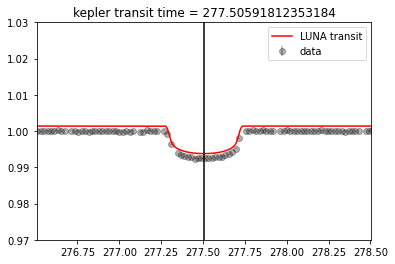

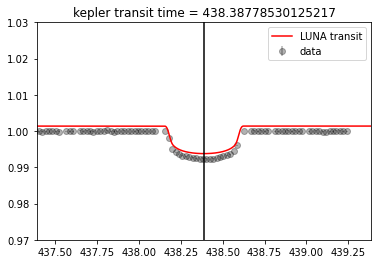

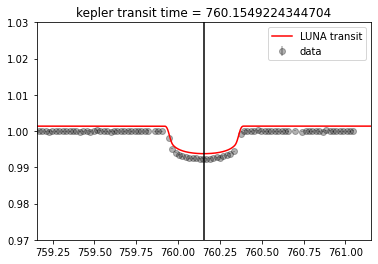

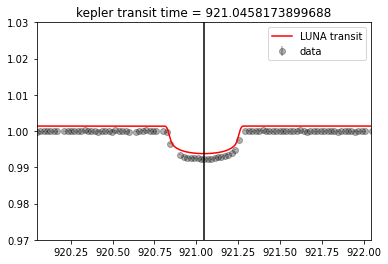

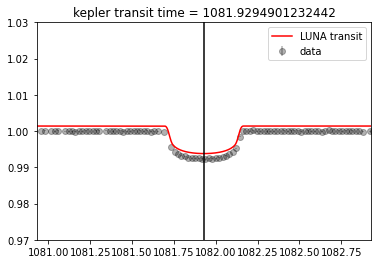

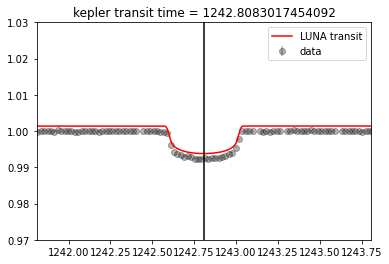

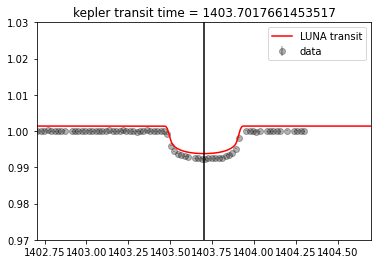

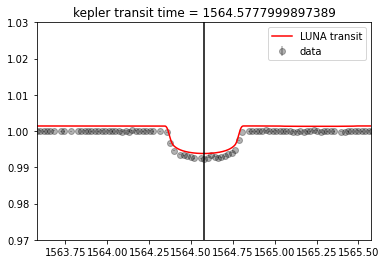

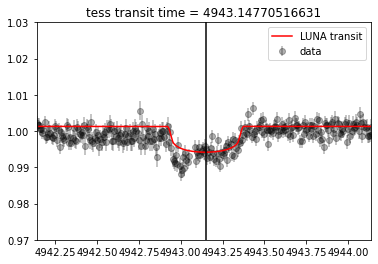

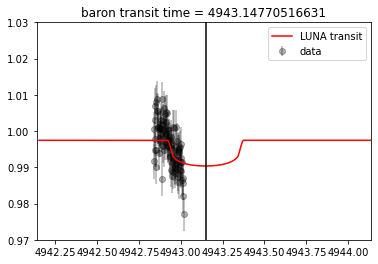

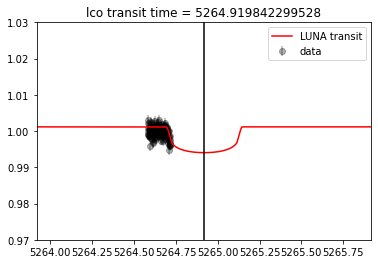

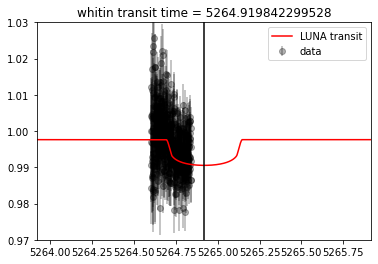

In [22]:
luna_t0s = []
for ii in range(0, len(kepler_t0s)):
    t0 = kepler_t0s[ii]
    plt.plot(kepler['time'], kepler['flux'], 'r', label='LUNA transit')
    plt.errorbar(kepler_lc['time'], kepler_lc['flux'], yerr=kepler_lc['flux_err'], 
                 color='k', ls='', marker='o', alpha=0.3, zorder=-10000, label = 'data')
    
    # Assuming your DataFrame is named 'df'
    filtered_df = kepler[(kepler['time'] >= t0 - 1) & (kepler['time'] <= t0 + 1)]

    # Find the minimum value in the 'flux' column within the filtered DataFrame
    minimum_flux = filtered_df['flux'].min()

    # Retrieve the corresponding value in the 'time' column
    corresponding_time = filtered_df.loc[filtered_df['flux'] == minimum_flux, 'time'].values[0]
    if corresponding_time not in luna_t0s:
        luna_t0s.append(corresponding_time)
        
        
    plt.axvline(corresponding_time, 0, 1, color = 'k')
        
    plt.title('kepler transit time = ' + str(corresponding_time))
    plt.xlim(kepler_t0s[ii]-1, kepler_t0s[ii]+1)
    plt.ylim(0.97,1.03)
    plt.legend()
    plt.show()
    
    

for ii in range(0, len(tess_t0s)):
    t0 = tess_t0s[ii]
    plt.plot(tess['time'], tess['flux'], 'r', label='LUNA transit')
    plt.errorbar(tess_lc['time'], tess_lc['flux'], yerr=tess_lc['flux_err'], 
                 color='k', ls='', marker='o', alpha=0.3, zorder=-10000, label = 'data')
    
    # Assuming your DataFrame is named 'df'
    filtered_df = tess[(tess['time'] >= t0 - 1) & (tess['time'] <= t0 + 1)]

    # Find the minimum value in the 'flux' column within the filtered DataFrame
    minimum_flux = filtered_df['flux'].min()

    # Retrieve the corresponding value in the 'time' column
    corresponding_time = filtered_df.loc[filtered_df['flux'] == minimum_flux, 'time'].values[0]
    if corresponding_time not in luna_t0s:
        luna_t0s.append(corresponding_time)
        
    plt.axvline(corresponding_time, 0, 1, color = 'k')
        
    plt.title('tess transit time = ' + str(corresponding_time))
    
    plt.legend()
    plt.xlim(tess_t0s[ii]-1, tess_t0s[ii]+1)
    plt.ylim(0.97,1.03)
    plt.show()
    
    

for t0 in range(0, len(baron_t0s)):
    t0 = baron_t0s[ii]
    plt.plot(baron['time'], baron['flux'], 'r', label='LUNA transit')
    plt.errorbar(baron_lc['time'], baron_lc['flux'], yerr=baron_lc['flux_err'], 
                 color='k', ls='', marker='o', alpha=0.3, zorder=-10000, label = 'data')

    filtered_df = baron[(baron['time'] >= t0 - 1) & (baron['time'] <= t0 + 1)]

    # Find the minimum value in the 'flux' column within the filtered DataFrame
    minimum_flux = filtered_df['flux'].min()

    # Retrieve the corresponding value in the 'time' column
    corresponding_time = filtered_df.loc[filtered_df['flux'] == minimum_flux, 'time'].values[0]
    if corresponding_time not in luna_t0s:
        luna_t0s.append(corresponding_time)
        
    plt.axvline(corresponding_time, 0, 1, color = 'k')
    
    plt.title('baron transit time = ' + str(corresponding_time))
   
    plt.legend()
    plt.xlim(baron_t0s[ii]-1, baron_t0s[ii]+1)
    plt.ylim(0.97,1.03)
    plt.show()

    
    
for ii in range(0, len(lco_t0s)):
    t0 = lco_t0s[ii]
    plt.plot(lco['time'], lco['flux'], 'r', label='LUNA transit')
    plt.errorbar(lco_lc['time'], lco_lc['flux'], yerr=lco_lc['flux_err'], 
                 color='k', ls='', marker='o', alpha=0.3, zorder=-10000, label = 'data')
    
    filtered_df = lco[(lco['time'] >= t0 - 1) & (lco['time'] <= t0 + 1)]

    # Find the minimum value in the 'flux' column within the filtered DataFrame
    minimum_flux = filtered_df['flux'].min()

    # Retrieve the corresponding value in the 'time' column
    corresponding_time = filtered_df.loc[filtered_df['flux'] == minimum_flux, 'time'].values[0]
    if corresponding_time not in luna_t0s:
        luna_t0s.append(corresponding_time)
        
    plt.axvline(corresponding_time, 0, 1, color = 'k')
    
    plt.title('lco transit time = ' + str(corresponding_time))
   
    plt.legend()
    plt.xlim(lco_t0s[ii]-1, lco_t0s[ii]+1)
    plt.ylim(0.97,1.03)
    plt.show()
    
    
    
for ii in range(0, len(whitin_t0s)):
    t0 = whitin_t0s[ii]
    plt.plot(whitin['time'], whitin['flux'], 'r', label='LUNA transit')
    plt.errorbar(whitin_lc['time'], whitin_lc['flux'], yerr=whitin_lc['flux_err'], 
                 color='k', ls='', marker='o', alpha=0.3, zorder=-10000, label = 'data')
    
    
    filtered_df = whitin[(whitin['time'] >= t0 - 1) & (whitin['time'] <= t0 + 1)]

    # Find the minimum value in the 'flux' column within the filtered DataFrame
    minimum_flux = filtered_df['flux'].min()

    # Retrieve the corresponding value in the 'time' column
    corresponding_time = filtered_df.loc[filtered_df['flux'] == minimum_flux, 'time'].values[0]
    if corresponding_time not in luna_t0s:
        luna_t0s.append(corresponding_time)
        
    plt.axvline(corresponding_time, 0, 1, color = 'k')
    
    plt.title('whitin transit time = ' + str(corresponding_time))
   
    plt.legend()
    plt.xlim(whitin_t0s[ii]-1, whitin_t0s[ii]+1)
    plt.ylim(0.97,1.03)
    plt.show()
    
    
    

    
    


In [6]:
luna_t0s

[277.50591812353184,
 438.38778530125217,
 760.1549224344704,
 921.0458173899688,
 1081.9294901232442,
 1242.8083017454092,
 1403.7017661453517,
 1564.5777999897389,
 4943.14770516631,
 5264.919842299528]

In [7]:
# Specify the file path and name
file_path = "luna_t0s.out"

# Open the file in write mode
with open(file_path, "w") as file:
    # Iterate over the list elements and write them to the file
    for item in luna_t0s:
        file.write(str(item) + "\n")

### Now get a densely sampled version of the LUNA times

In [8]:
def aliased_period(Pttv, Ptrans):
    '''
    inputs:
    Pttv: [float] period of ttv signal
    Ptrans: [float] period of transiting planet
    
    
    outputs:
    aliased_periods: [list] possible aliased periods
    m_vals: [list] the m values corresponding with the aliased periods
    '''
    
    
    
    aliased_periods = []
    m_vals = []
    for m in range(1, 100):
        period_test_plus = 1 / np.abs((1/Pttv) + (m/Ptrans))
        period_test_minus = 1 / np.abs((1/Pttv) - (m/Ptrans))
        
        if period_test_plus > 2*Ptrans:
            aliased_periods.append(period_test_plus)
            m_vals.append(m)
            
        if period_test_minus > 2*Ptrans:
            aliased_periods.append(period_test_minus)
            m_vals.append(-m)
            
    
    return aliased_periods, m_vals
            
    

In [9]:
#MAP Ps = 67.36613239273719
#MAP Pb = 160.8843553159277
Ps = 67.36613239273719
Pb = 160.8843553159277

pTTV_alias = aliased_period(Ps, Pb)
print(pTTV_alias)
pTTV_alias = pTTV_alias[0][0]/Pb

pTTV_alias


([414.42793139279814], [-2])


2.575936799939238

In [10]:
epochs = np.array([0,1,3,4,5,6,7,8,29,31])+1



koi3678_period = Pb # = MAP from LUNA model
koi3678_t0 = 277.506347 # = MAP from LUNA model


In [11]:
from scipy import optimize

def get_times_model(epochs, T0, P, alpha_ttv, beta_ttv): 
    return T0 + P*epochs + alpha_ttv*np.sin((2*np.pi*epochs/ P_ttv)) +  beta_ttv*np.cos((2*np.pi*epochs/ P_ttv))

def get_times_null_model(epochs, T0, P): 
    return T0 + P*epochs

def get_chisq(times, times_model, times_err):
    chisq = 0
    for ii in range(0, len(times)):
        chisq += ( ((times_model[ii] - times[ii])**2) / (times_err[ii]**2) )
    

    return chisq

In [12]:
Pmin = 2
Pmax = 100
fmin = 1/Pmax
fmax = 1/Pmin

fgrid = np.arange(fmin, fmax, 0.01*fmin)
Pgrid = np.sort(1/fgrid)


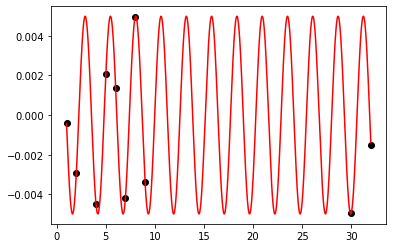

In [13]:
P_ttv = pTTV_alias
model,_  = optimize.curve_fit(get_times_model, epochs, luna_t0s)

epochs_plot = np.arange(np.min(epochs), np.max(epochs), 0.01)
luna_times_dense = get_times_model(epochs_plot, *model)
luna_ttvs_dense = luna_times_dense - get_times_null_model(epochs_plot, *model[0:2])
ttvs_input = luna_t0s - get_times_null_model(epochs, *model[0:2])


plt.plot(epochs, ttvs_input, ls='', marker='o', color='k')
plt.plot(epochs_plot, luna_ttvs_dense, 'r')


In [14]:
d = {'epochs': epochs_plot-1, 'times': luna_times_dense}
luna_times_dense_df = pd.DataFrame(data=d)

luna_times_dense_df.to_csv('luna_t0s_dense.out', sep=',', index=False)
